1.<b> Introduction to your dataset and loading: <br> </b>
a. Source:
Kaggle – house prediction data 

  Link: [House Sales in King County, USA | Kaggle ](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

  b. This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
  

  The following features have been provided:


*   Date: Date house was sold
*   Price: Price is prediction target


*   Bedrooms: Number of Bedrooms/House

*   Bathrooms: Number of bathrooms/House

*   Sqft_Living: square footage of the home

*   Sqft_Lot: square footage of the lot

*   Floors: Total floors (levels) in house

*   Waterfront: House which has a view to a waterfront
*   View: Has been viewed
*   Condition: How good the condition is ( Overall )
*   Grade: grade given to the housing unit, based on King County grading system


*   Sqft_Above: square footage of house apart from basement


*   Sqft_Basement: square footage of the basement


*   Yr_Renovated: Year when house was renovated


*   Zipcode: Zip


*   Lat: Latitude coordinate

*   Long: Longitude coordinate
*   Sqft_Living15: Living room area in 2015(implies — some renovations)


*   Sqft_Lot15: lotSize area in 2015(implies — some renovations)










 

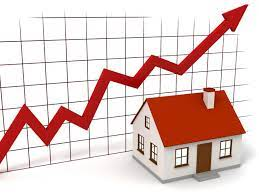

In [ ]:
#IMPORT REQUIRED LIBRARIES
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf 

c. Load the Dataset

In [ ]:
#READ  DATASET
#df = pd.read_csv('kc_house_data.csv')
df = pd.read_csv('https://raw.githubusercontent.com/Darshan-Ekbote/Data-Science-Projects/master/house_price_prediction/kc_house_data.csv')

In [ ]:
#DATASET HEAD
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#GET DATASET INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
#MORE DETAILS OF THE DATASET WITH DESCRIBE METHOD
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


d. Data cleaning and preprocessing

In [ ]:
#CHECK THE NUMBER OF NULLS IN THE DATASET 
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
x=df.date==' '
x.value_counts()

False    21613
Name: date, dtype: int64

e. No missing values to be handled

f. Checking for outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


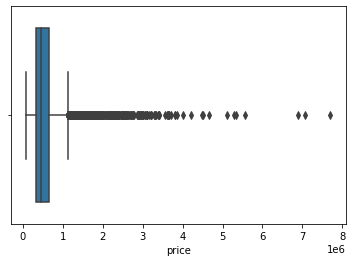

In [ ]:
#checking the outliers

# Box Plot
import seaborn as sns
sns.boxplot(df['price'])

With distribution plot of price, we can visualize that most of the prices are between 0 and around 1M with few outliers close to 8 million. It would make sense to drop those outliers in our analysis

In [ ]:
outliers = np.where(df['price']>5000000)
print(outliers)
print("Old Shape: ",df.shape)

(array([1164, 1315, 1448, 3914, 4411, 7252, 9254]),)
Old Shape:  (21613, 21)


In [ ]:
#dropping outliers
df.drop(outliers[0], inplace = True)
print("New Shape: ",df.shape)

New Shape:  (21606, 21)


  2.<b>
  The task here is to create a machine learning model that can predict the house prices which is a Regression problem.

3.<b> Perform an exploratory data analysis: </b>


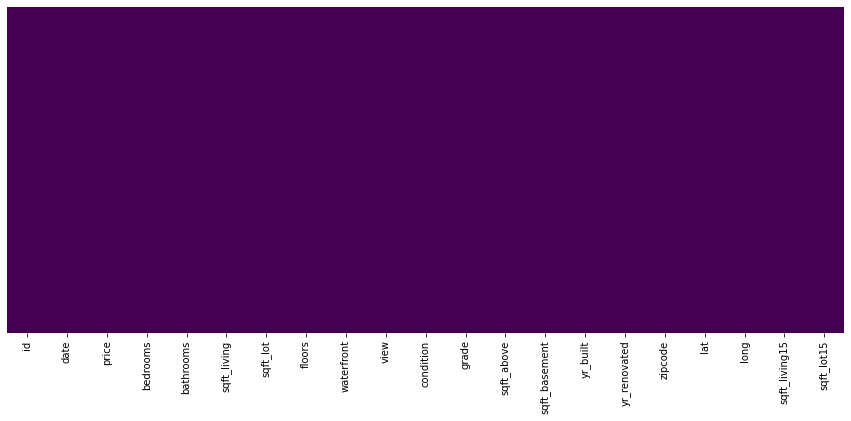

In [ ]:
#VISUALIZATION OF NULLS IN THE DATASET WITH HEATMAP
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

b. Distribution/histogram of fields in the dataset

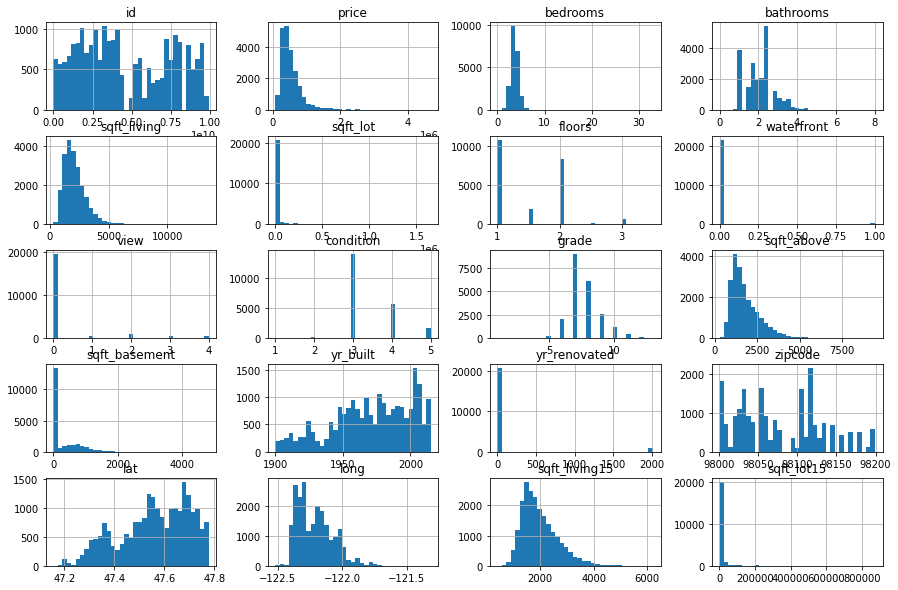

In [ ]:
# creating a histogram
df.hist(bins=35, figsize=(15, 10))
plt.show()

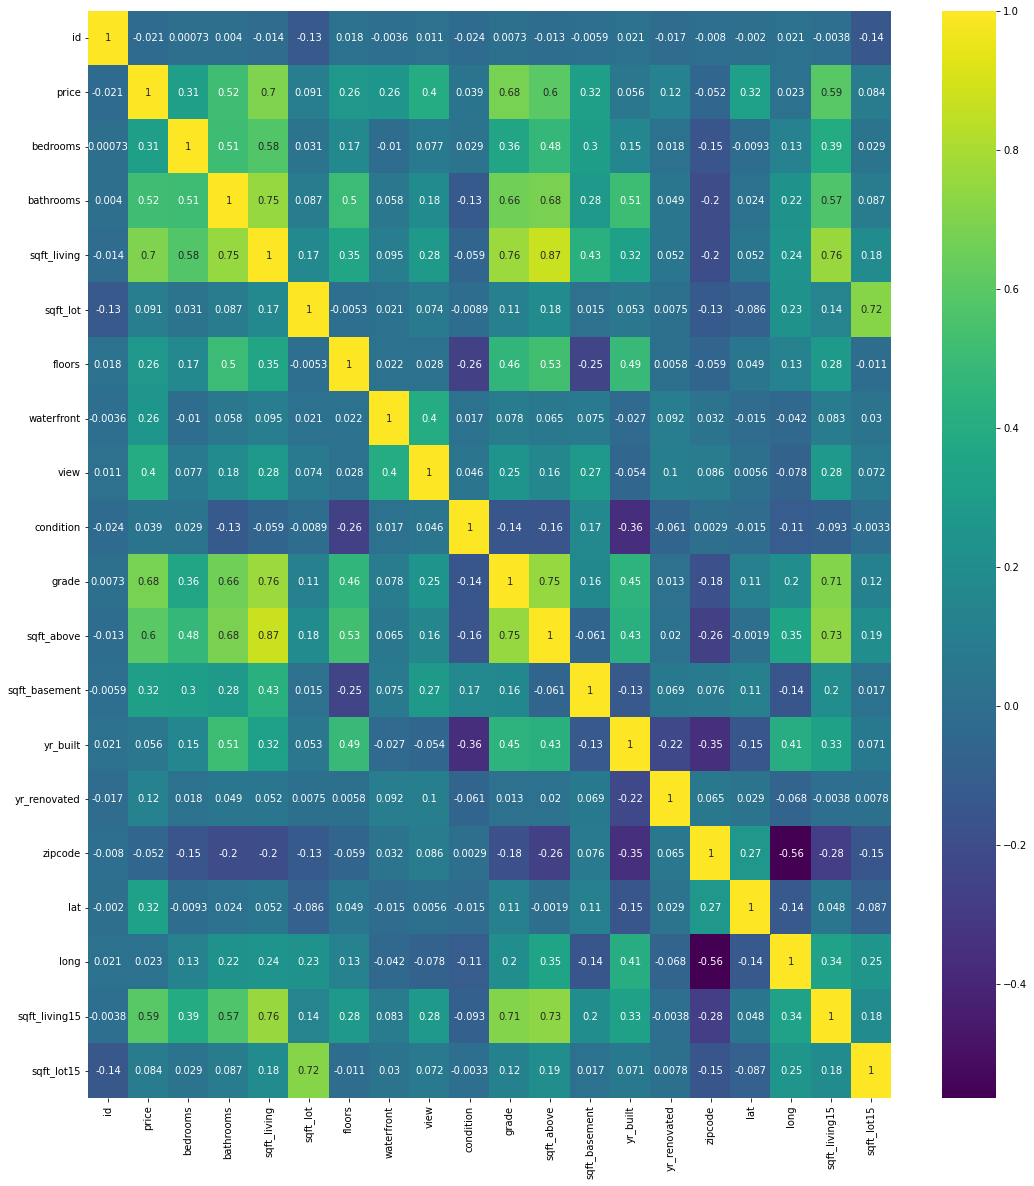

In [ ]:
#PLOT CORRELATION MATRICS
plt.figure(figsize=(18,20))
sns.heatmap(df.corr(),cmap="viridis",annot=True);

In [ ]:
#SORT FEATURES BY CORRELATION  
df.corr()['price'].sort_values(ascending=True)

zipcode         -0.051737
id              -0.021486
long             0.023489
condition        0.038697
yr_built         0.055769
sqft_lot15       0.083609
sqft_lot         0.091250
yr_renovated     0.123944
waterfront       0.256096
floors           0.261745
bedrooms         0.309731
sqft_basement    0.315393
lat              0.317089
view             0.396352
bathrooms        0.522205
sqft_living15    0.594897
sqft_above       0.601008
grade            0.676339
sqft_living      0.696762
price            1.000000
Name: price, dtype: float64

<Figure size 1080x360 with 0 Axes>

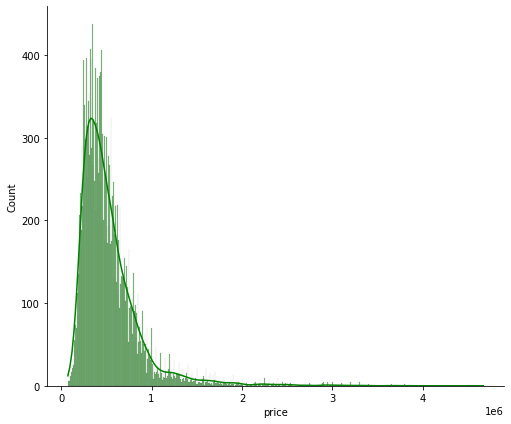

In [ ]:
#PLOT DISTRIBUTION OF PRICE IN THE DATAFRAME 
plt.figure(figsize=(15,5))
sns.displot(df.price,kde=True,bins=600,color='green',height=6,aspect = 1.2  )

 Most of the prices of houses are below $2 million

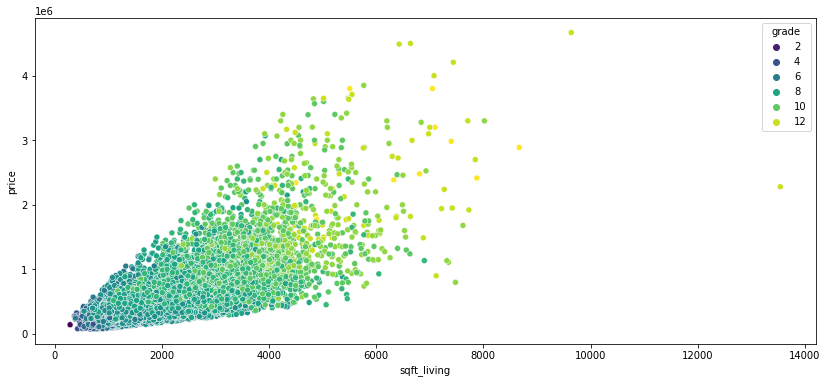

In [ ]:
#SEE THE RELATIONSHIP BETWEEN sqft_living AND price BY SCATTERPLOT
plt.figure(figsize=(14,6))
sns.scatterplot(x='sqft_living',y='price',data=df,hue='grade',palette="viridis")

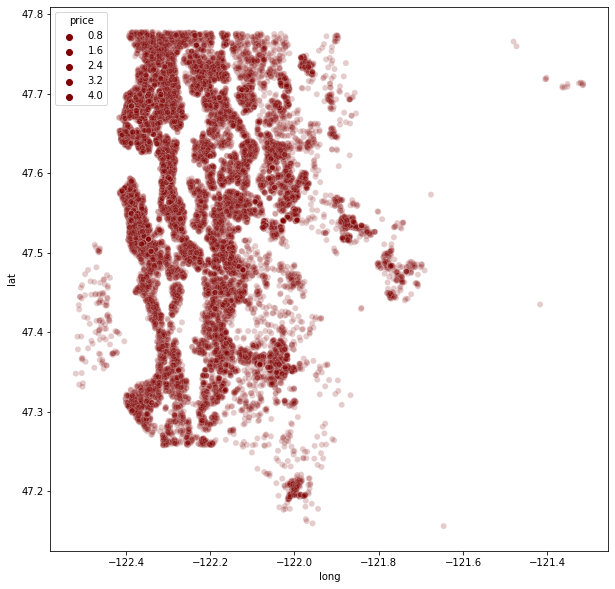

In [ ]:
#SEE THE RELATIONSHIP BETWEEN LOCATION (long,lat) AND price BY SCATTERPLOT
plt.figure(figsize=(10,10))
sns.scatterplot(x='long',y='lat',data=df,hue='price',alpha=0.2, palette="seismic", hue_norm=(2,12))

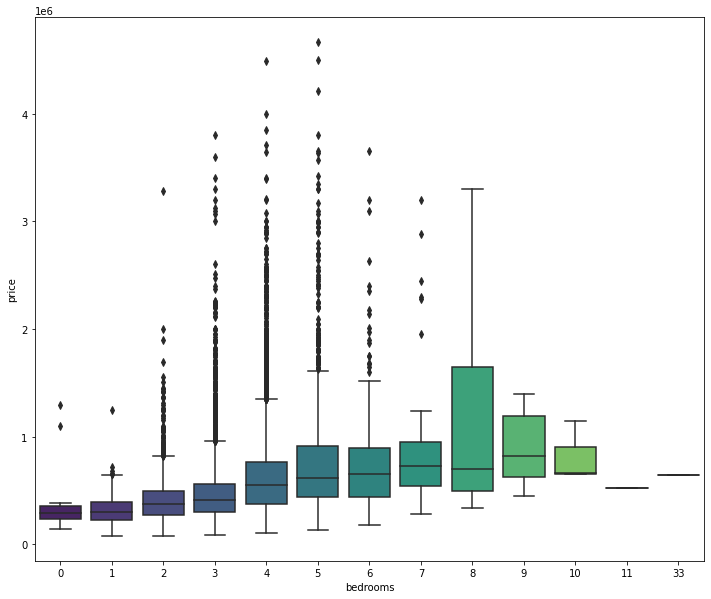

In [ ]:
#VISUALIZATION OF price BASED ON NUBMER OF bedrooms WITH BOXPLOT
plt.figure(figsize=(12,10))
sns.boxplot( x='bedrooms',
    y='price',
      data=df,
           palette='viridis')

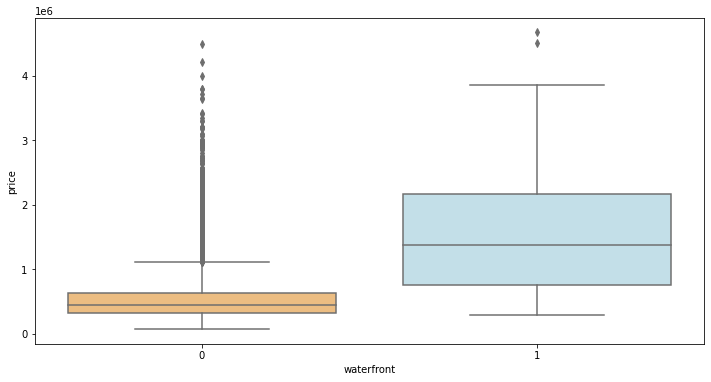

In [ ]:
#VISUALIZATION OF price BASED ON NUBMER OF waterfront WITH BOXPLOT
plt.figure(figsize=(12,6))
sns.boxplot(x='waterfront',y='price',data=df,
    palette='RdYlBu')

In [ ]:
#CONVERT TO DATETIME DATATYPE 
df['date'] =pd.to_datetime(df['date'])

In [ ]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21606, dtype: datetime64[ns]

In [ ]:
#GET YEAR AND MONTH FROM DATE 
df['year']= df['date'].apply(lambda date : date.year)
df['month']= df['date'].apply(lambda date : date.month)

g. What variables are more important in explaining your target variable?

In [ ]:
#DROP COLUMNS BASED ON VERY LESS CORRELATION WITH PRICE
df=df.drop(['id','zipcode','date'],axis=1)

In [ ]:
#NEW DATAFRAME
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


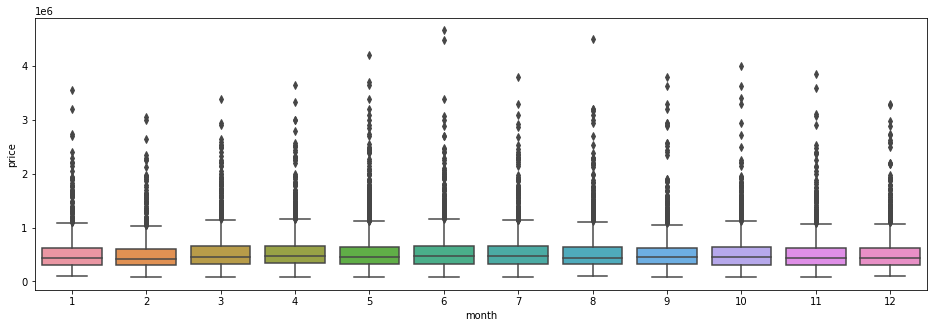

In [ ]:
plt.figure(figsize=(16,5))
sns.boxplot(x='month',y='price',data=df)

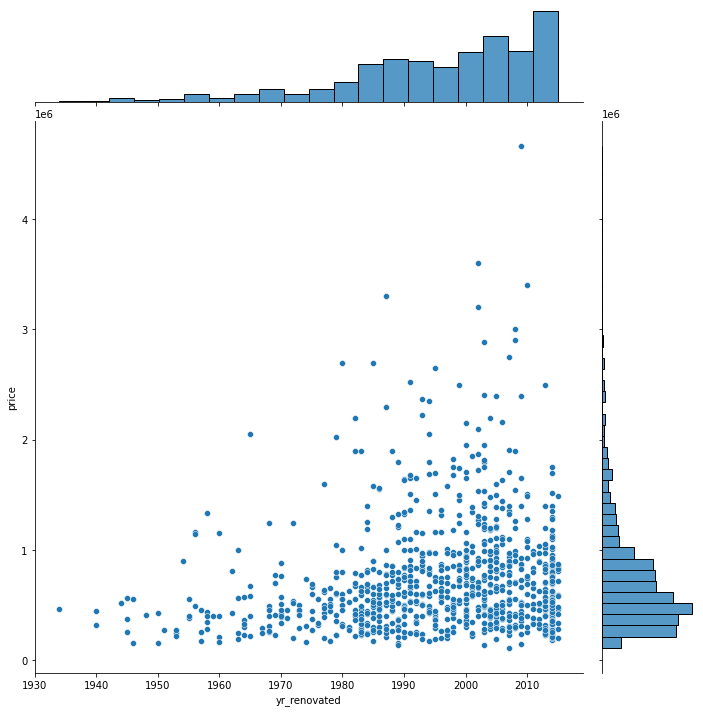

In [ ]:
#CHANGE IN price BASED ON yr_renovated
sns.jointplot(x='yr_renovated',y='price',data=df[df['yr_renovated']>0],height =10)

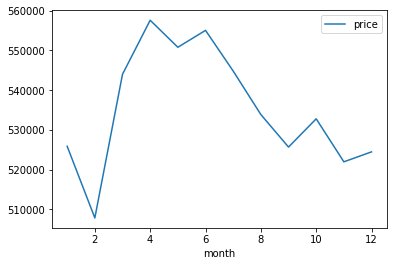

In [ ]:
#price FLUCTUATION BY month
df[['price','month']].groupby('month').mean().plot()

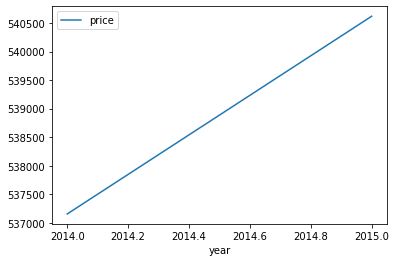

In [ ]:
#price FLUCTUATION BY year
df[['year','price']].groupby('year').mean().plot()

<Figure size 1152x360 with 0 Axes>

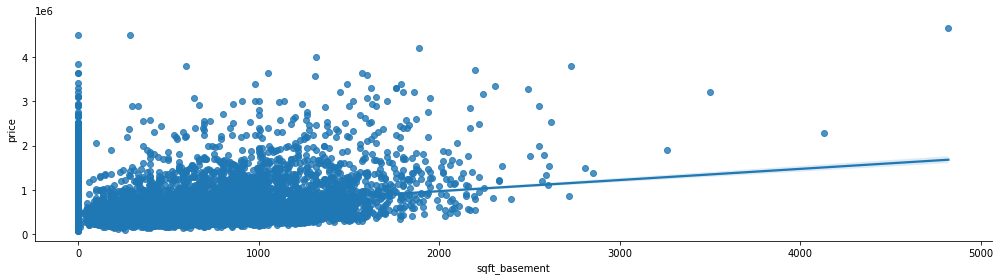

In [ ]:
#REGRESSION PLOT OF  sqft_basement AND price
plt.figure(figsize=(16,5))
sns.lmplot(x='sqft_basement',y='price',data=df,height=4,aspect=3.5,legend=True)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [ ]:
#X- FEATURE , Y- TARGET
X=df.drop('price',axis=1).values
y=df.price.values

h. Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) #tell pca to convert in 2 dimensions
print("Shape before PCA:" ,X.shape)

x_pca = pca.fit_transform(X);
print("Shape after PCA:" ,x_pca.shape)
pca.explained_variance_ratio_

Shape before PCA: (21606, 19)
Shape after PCA: (21606, 2)


array([0.88372925, 0.11535651])

In [ ]:
x_principalDf = pd.DataFrame(data = x_pca
             , columns = ['P1', 'P2'])
finalDf = x_principalDf
x_principalDf.head()

,P1,P2
0,-11738.492077,1526.819699
1,-9362.542143,575.645221
2,-6764.464889,1574.380622
3,-12622.059049,1769.211667
4,-8705.829340,1110.998038


In [ ]:
#IMPORT train_test_split AND SPLIT THE DATA INTO TRINING AND TESTING SETS
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

Feature scaling will help us see all the variables from the same lens (same scale), it will also help our models learn faster.

IMPORT STANDARDSCALAR FOR SCALING THE DATA  

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
X_train =scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

4. <b> Final analysis/Model building 
  
  Linear regression and Sequential model from TensorFlow are used. 

In [ ]:
#IMPORT Sequential MODEL 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
X_train.shape

(14476, 19)

Since we have 19 features, let’s insert 19 neurons as a start, 4 hidden layers and 1 output layer due to predict house Price.

In [ ]:
#INITIALIZE AND ADD LAYERS TO Sequential  MODEL
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

#ADAM optimization algorithm is used for optimizing loss function (Mean squared error)
model.compile(optimizer='Adam',loss='mse')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min',verbose =1 ,patience = 15)

In [ ]:
#FIT THE DATA BY TRAINING  
model.fit(x=X_train,y=y_train,
             validation_data=(X_test,y_test),
             batch_size=128,
             epochs=400,
             callbacks =[es])

#MODEL SUMMARY
model.summary()

In [ ]:
#SAVE TRAINED DATA FOR FUTURE USE
model.save('house_prediction_model.h5')

In [ ]:
#GET THE LOSS FROM MODEL IN PANDAS DF
loss=pd.DataFrame(model.history.history)

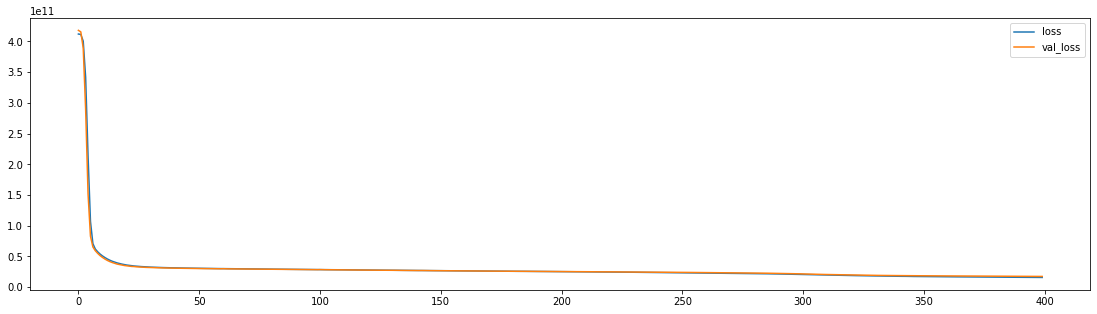

In [ ]:
#PLOT LOSS
loss.plot(figsize =(19,5))

In [ ]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error, explained_variance_score, r2_score
import sklearn.metrics as metrics

5.1 <b> Evaluating results for Sequential model from Tensorflow 

In [ ]:
y_pred_sq=model.predict(X_test)

223/223 [==============================] - 1s 3ms/step


In [ ]:
#CALCULATION OF THE MATRICS
print("mean_squared_error : ",mean_squared_error(y_test,y_pred_sq))
print("mean_absolute_error : ",mean_absolute_error(y_test,y_pred_sq))
print("explained_variance_score : ",explained_variance_score(y_test,y_pred_sq))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_sq)))

mean_squared_error :  17436852822.806602
mean_absolute_error :  80789.4639030724
explained_variance_score :  0.8630454823072191
RMSE: 132048.67596006635


In [ ]:
#PRINT THE ACCURACY OF THE MODEL
print("Accuracy : ",r2_score(y_test,y_pred_sq)*100 ,"%")

Accuracy :  86.29258274705538 %


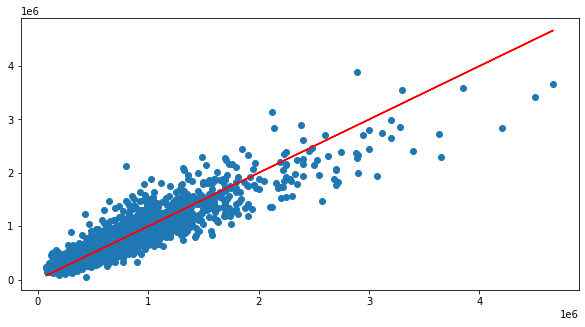

In [ ]:
#MODEL PREDICTIONS
plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=y_pred_sq)
#PERFECT MODEL PREDICTIONS
plt.plot(y_test,y_test,'r')

**4.2 Using LinearRegression for prediction**

In [ ]:
#INITIALIZING AND TRAINING LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
lr = LinearRegression();
lr.fit(X_train,y_train);

In [ ]:
from sklearn.metrics import classification_report
y_pred_lr = lr.predict(X_test);

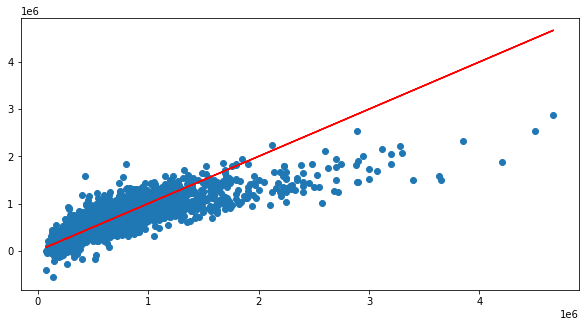

In [ ]:
#MODEL PREDICTIONS
plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=y_pred_lr)
#PERFECT MODEL PREDICTIONS
plt.plot(y_test,y_test,'r')

**5.2 Evaluating results for Linear Regression**

In [ ]:
#CALCULATION OF THE MATRICS
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))


Mean Absolute Error: 122724.12966527668
Mean Squared Error: 36959841148.53589
Root Mean Squared Error: 192249.42431262543


In [ ]:
#PRINT THE ACCURACY OF THE MODEL
print("Accuracy : ",r2_score(y_test,y_pred_lr)*100 ,"%")

Accuracy :  70.9452176161691 %


ROC SCORE

In [ ]:
def regression_roc_auc_score(y_true, y_pred, num_rounds = 10000):
  import numpy as np
    
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  num_pairs = 0
  num_same_sign = 0
  
  for i, j in _yield_pairs(y_true, num_rounds):
    diff_true = y_true[i] - y_true[j]
    diff_score = y_pred[i] - y_pred[j]
    if diff_true * diff_score > 0:
      num_same_sign += 1
    elif diff_score == 0:
      num_same_sign += .5
    num_pairs += 1
      
  return num_same_sign / num_pairs


def _yield_pairs(y_true, num_rounds):
  import numpy as np
  
  if num_rounds == 'exact':
    for i in range(len(y_true)):
      for j in np.where((y_true != y_true[i]) & (np.arange(len(y_true)) > i))[0]:
        yield i, j     
  else:
    for r in range(num_rounds):
      i = np.random.choice(range(len(y_true)))
      j = np.random.choice(np.where(y_true != y_true[i])[0])
      yield i, j


print("ROC SCORE For Sequential model = {}".format(regression_roc_auc_score(y_test,y_pred_sq)))
print("ROC SCORE For Linear regression model = {}".format(regression_roc_auc_score(y_test,y_pred_lr)))

ROC SCORE For Sequential model = 0.8844
ROC SCORE For Linear regression model = 0.8362


6. <b>Discussion and Conclusion

  a. Summarize your findings and analysis </b><br>

  In this project, we built the prediction models for house price prediction on house sale price data set for king County. We trained two models namely Linear Regression and Sequential model from TensorFlow. We achieved accuracy of around 85% on the sequential model and 70% on Linear regression showing that sequential model performs better. We performed EDA (exploratory data analysis) along data cleaning and preprocessing which showed us some strong correlations such as sq ft with price, we also analyzed that most of the houses were lower than $2 million. We dropped non-important columns like 'id' and 'date'. We analyzed fluctuations of price wit month and year and found some prominent trends such as price dropping in the start of the year and increasing in the mid. The sequential model with 400 epochs that uses ADAM optimization algorithm is used for optimizing loss function (Mean squared error) has RMSE (loss function) lower than linear regression which shows that our prediction is closer to actual rating price.

 <b> b. What further analysis can be done? </b>

  As future work, this score might be improved through feature selection or using other regression models.